En este notebook se van a comparar las metricas de precisión de los modelos generados anteriormente.

## Importar librerias

In [1]:
import os
from pathlib import PurePath
import json
import pandas as pd
import matplotlib.pyplot as plt

# Métricas de validación para los datos agrometeorologicos

Aplica para cualquier metodo, fourier, arima y holt.

In [25]:
climate_vars = ['evapotranspiration', 'solar_radiation', 'temperature', 'relative_humidity']

In [39]:
for var in climate_vars:
    var_path = rf'../../data_analysis/fourier/parametros/{var}'
    files = [(json.load(open(PurePath(var_path, file), "r")), int(file.split('.')[0].split('_')[1])) for file in os.listdir(var_path) if file.endswith(".json")]

    metrics = {
        'parcela': [],
        'mse': [],
        'rsquared': []
    }
    
    for i in files:
        metrics['parcela'].append(i[1])
        metrics['mse'].append(i[0]['mse'])
        metrics['rsquared'].append(i[0]['r2'])

    df = pd.DataFrame(metrics)
    print(f'Variable: {var}, mse promedio: {df['mse'].mean()}, r2: {df['rsquared'].mean()}')

Variable: evapotranspiration, mse promedio: 0.8233066464598118, r2: 0.6069494927219782
Variable: solar_radiation, mse promedio: 15947921266393.629, r2: 0.4971708377325017
Variable: temperature, mse promedio: 7.959922202802799, r2: 0.615857256817256
Variable: relative_humidity, mse promedio: 94.93728922402566, r2: 0.13477953070798224


# Métricas de validación para los modelos cuadraticos de los índices espectrales

In [2]:
z21 = r'../../results/metrics/zafra_vis_metrics/zafra2021_vis_metrics.csv'
z22 = r'../../results/metrics/zafra_vis_metrics/zafra2022_vis_metrics.csv'
z23 = r'../../results/metrics/zafra_vis_metrics/zafra2023_vis_metrics.csv'

In [3]:
z21_df = pd.read_csv(z21)
z22_df = pd.read_csv(z22)
z23_df = pd.read_csv(z23)

In [4]:
zafras = pd.concat([z21_df, z22_df, z23_df])
zafras_mean = zafras.groupby('indice').mean()

In [6]:
zafras_mean

,parcela_id,a,b,c,r2,mse,rmse
indice,,,,,,,
cire_mean,8.266667,-0.000041,0.018442,-0.171034,0.837225,8.119712,2.734348
gndvi_mean,8.266667,-0.000006,0.002867,0.242104,0.877599,0.222998,0.458442
msi_mean,8.266667,0.000014,-0.007448,1.650012,0.895987,2.033968,1.363448
ndmi_mean,8.266667,-0.000007,0.003709,-0.278705,0.899926,0.494653,0.677806
ndre1_mean,8.266667,-0.000007,0.003436,0.007630,0.906125,0.285334,0.520221
ndvi_mean,8.266667,-0.000009,0.004585,0.133981,0.924251,0.550596,0.725493


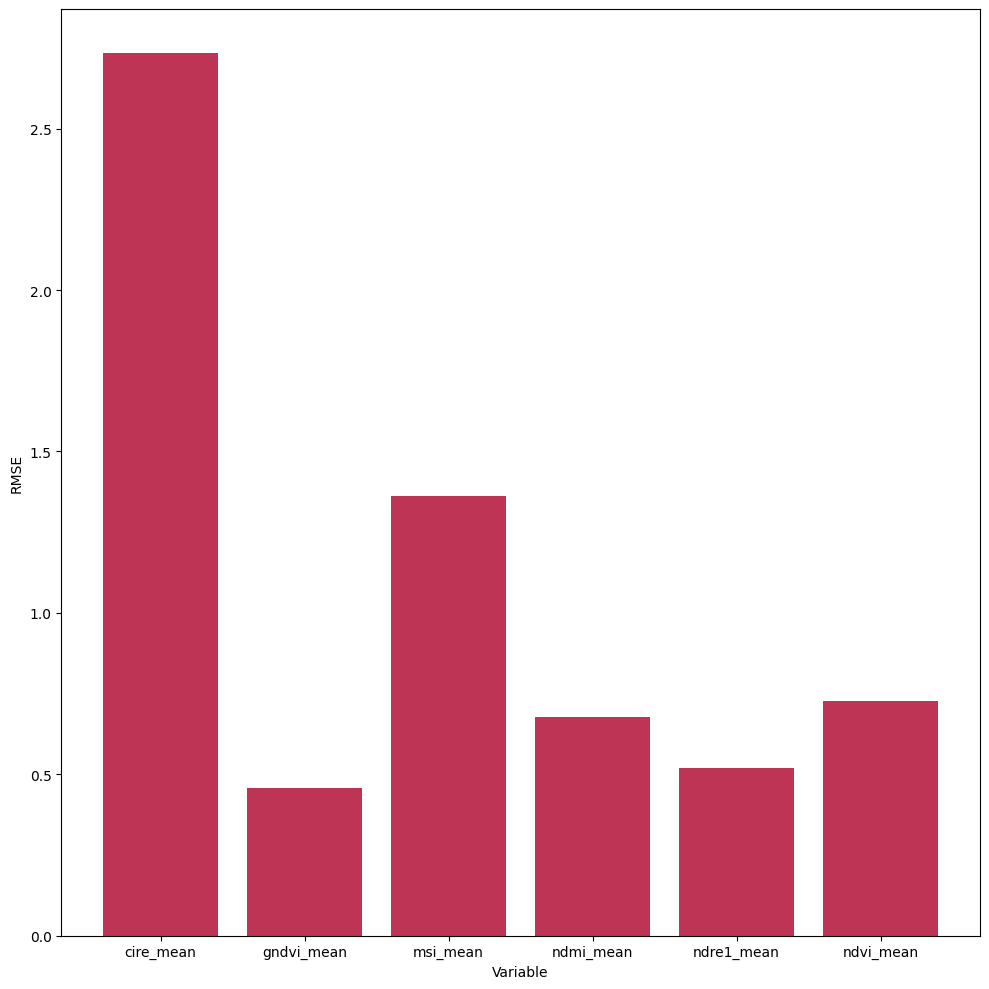

In [18]:
plt.figure(figsize=(10, 10))
plt.bar(zafras_mean.index, zafras_mean['rmse'], color='#BE3455', alpha=1)
plt.ylabel('RMSE')
plt.xlabel('Variable')
plt.tight_layout()
plt.savefig(r'../../tesis_img/metricas/vis_rmse.pdf', dpi=150)
plt.show()

## Comparación de las metricas de los modelos de rendimientos

In [7]:
with open(r"C:\Users\Isai\Documents\Tesis\code\data_analysis\lr_metrics\lr_juntos_max.json", "r") as file:
    metrics_max = json.load(file)
    
with open(r"C:\Users\Isai\Documents\Tesis\code\data_analysis\lr_metrics\lr_juntos_mean.json", "r") as file:
    metrics_mean = json.load(file)

In [8]:
metrics_max

[{'var': 'ndvi_max', 'r2': 0.571676, 'mse': 3688.252318, 'rmse': 60.73},
 {'var': 'cire_max', 'r2': 0.62443, 'mse': 4028.6035, 'rmse': 63.47},
 {'var': 'gndvi_max', 'r2': 0.67642, 'mse': 4363.381202, 'rmse': 66.05},
 {'var': 'ndre1_max', 'r2': 0.587777, 'mse': 3792.134169, 'rmse': 61.58}]

In [12]:
df_max = pd.DataFrame(metrics_max)
df_mean = pd.DataFrame(metrics_mean)

In [36]:
df_dif = pd.DataFrame()

In [57]:
df_dif['r2'] = abs(df_max['r2'] - df_mean['r2'])/df_mean['r2'] * 100
df_dif['mse'] = abs(df_max['mse'] - df_mean['mse'])/df_mean['mse'] * 100
df_dif['rmse'] = abs(df_max['rmse'] - df_mean['rmse'])/df_mean['rmse'] * 100
df_dif['var'] = df_max['var'].apply(lambda x: x.split('_')[0])

In [58]:
df_dif.dropna()

,r2,mse,rmse,var
0,1.512095,1.512078,0.751757,ndvi
1,3.787159,3.787168,1.901082,cire
2,11.269980,11.283070,5.817767,gndvi
3,3.300386,3.300332,1.660811,ndre1


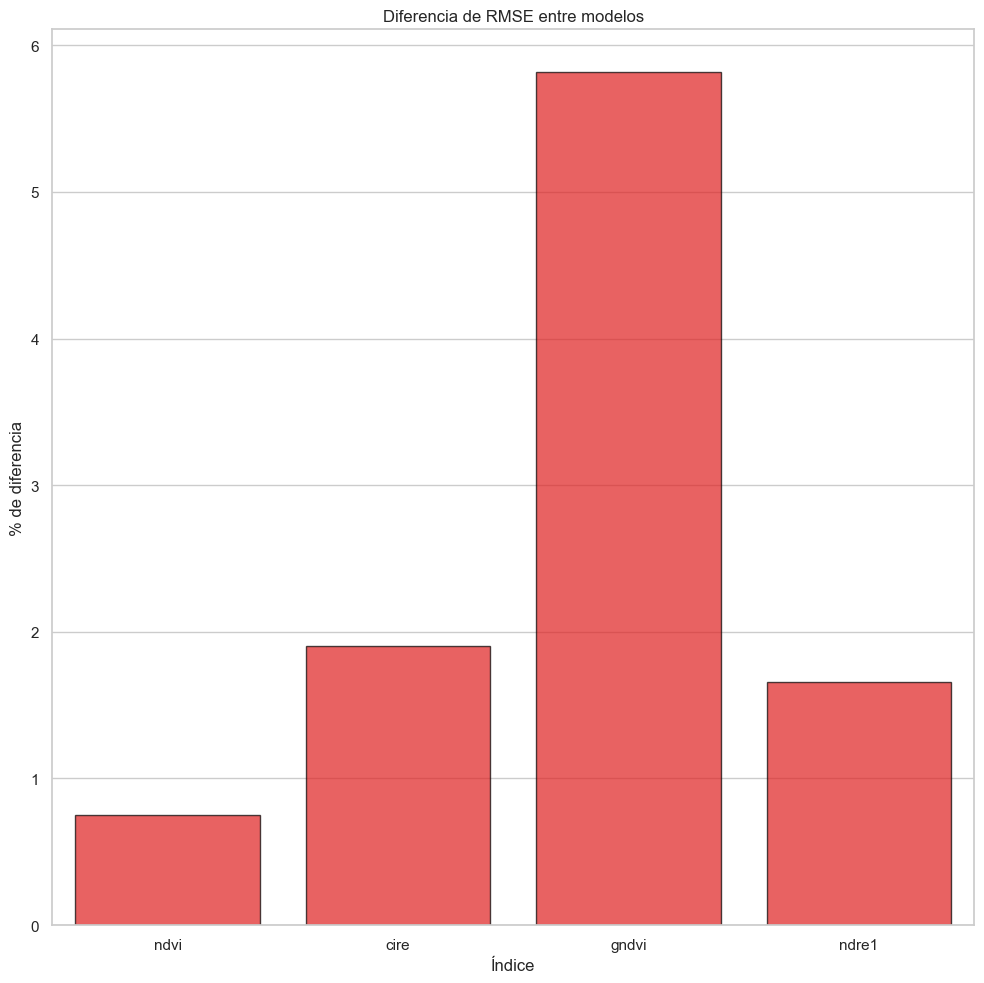

In [83]:
metric_var = 'rmse' 
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x='var', y=metric_var, data=df_dif, color='red', edgecolor='black', alpha=0.7)
plt.title(f'Diferencia de {metric_var.upper()} entre modelos')
plt.xlabel('Índice')
plt.ylabel('% de diferencia')
plt.tight_layout()
plt.savefig(PurePath(rf"C:\Users\Isai\Documents\Tesis\code\revision\img\juntos\metrics\{metric_var}_dif.png"), dpi=100)
plt.show()